Martin Paz

### TP2 Visión por computadora

Implementar un detector de máximo enfoque sobre un video aplicando técnicas de análisis espectral similar al que utilizan las
cámaras digitales modernas. El video a procesar será: “focus_video.mov”.

1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper "Image
Sharpness Measure for Blurred Images in Frequency Domain“ y realizar tres experimentos:
1. Medición sobre todo el frame.
2. Medición sobre una ROI ubicada en el centro del frame.  Area de la ROI = 5 o 10% del area total del frame.
3. Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc ... (al menos 3) 

Para cada experimento se debe presentar :
- Una curva o varias curvas que muestren la evolución de la métrica frame a frame donde se vea claramente cuando el algoritmo detecto el punto 
de máximo enfoque.
- Video con la ROI o matriz,  graficada en rojo y superpuesta al video original para los frames que no están en foco y verde para los frames
donde se detecta la condición de máximo enfoque.

2. Cambiar la métrica de enfoque eligiendo uno de los algoritmos explicados en el apéndice de: Analysis of focus measure 
operators in shapefrom focus.
1. Medicion de foco en toda la imagen
El algoritmo de detección a implementar debe detectar y devolver los puntos de máximo enfoque de manera 
automática.


#### Parte 1 y 2

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def calculate_focus_measure(frame):
    # Step 1: Compute Fourier Transform of the image
    F = np.fft.fft2(frame)

    # Step 2: Shift the zero-frequency component to the center
    Fc = np.fft.fftshift(F)

    # Step 3: Compute the absolute value of the centered Fourier Transform
    AF = np.abs(Fc)

    # Step 4: Find the maximum value in the frequency domain
    M = np.max(AF)

    # Step 5: Thresholding
    threshold = M / 500
    TH = np.sum(AF > threshold)

    # Step 6: Compute the Focus Measure (FM)
    FM = TH / (frame.shape[0] * frame.shape[1])

    return FM

#Vamos a cambiar de metrica y vamos a utilizar el Enfoque a la energía del gradiente (GRA2), 
# que se basa en la suma de los cuadrados de la primera derivada en las direcciones x e y

def calculate_focus_measure_with_gradient_energy(frame):
    # Convertir la imagen a escala de grises si no lo está
    if len(frame.shape) == 3:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calcular la primera derivada en la dirección x
    grad_x = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=3)
    
    # Calcular la primera derivada en la dirección y
    grad_y = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calcular la energía del gradiente (GRA2)
    grad_energy = np.sum(grad_x**2 + grad_y**2)
    
    # Normalizar la energía del gradiente por el tamaño de la imagen
    FM = grad_energy / (frame.shape[0] * frame.shape[1])
    
    return FM



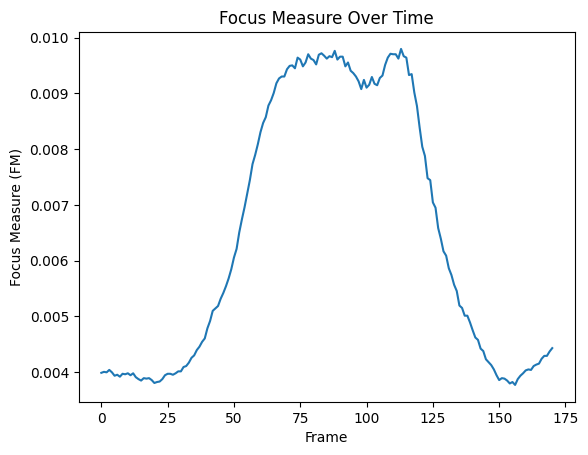

In [2]:
video_path = 'focus_video.mov'
cap = cv2.VideoCapture(video_path)

frame_focus_measures = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate focus measure
    fm = calculate_focus_measure(gray_frame)
    frame_focus_measures.append(fm)

cap.release()

# Plot the focus measures over time (frame index)
plt.plot(frame_focus_measures)
plt.title('Focus Measure Over Time')
plt.xlabel('Frame')
plt.ylabel('Focus Measure (FM)')
plt.show()

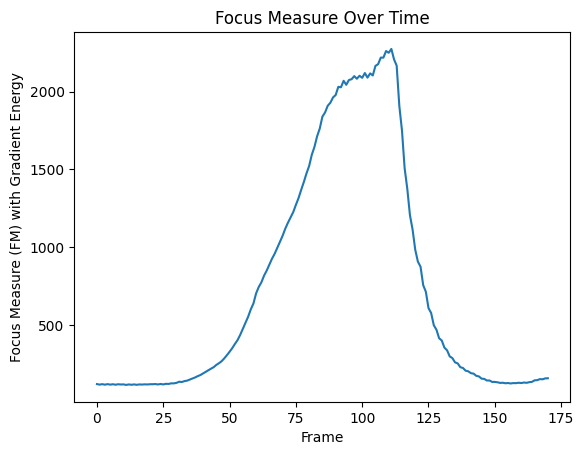

In [3]:
cap = cv2.VideoCapture(video_path)

frame_focus_measures = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate focus measure
    fm = calculate_focus_measure_with_gradient_energy(gray_frame)
    frame_focus_measures.append(fm)

cap.release()

# Plot the focus measures over time (frame index)
plt.plot(frame_focus_measures)
plt.title('Focus Measure Over Time')
plt.xlabel('Frame')
plt.ylabel('Focus Measure (FM) with Gradient Energy')
plt.show()

#### Medicion sobre ROI

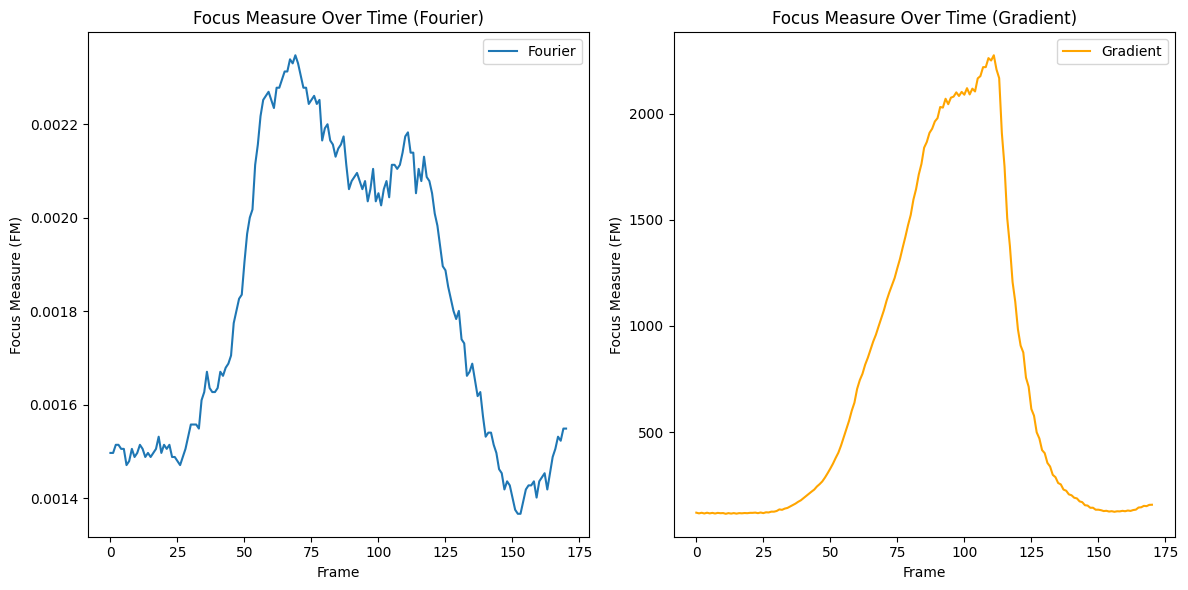

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def calculate_focus_measure(frame, threshold, method='fourier'):
    # Convertir la imagen a escala de grises si no lo está
    if len(frame.shape) == 3:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if method == 'fourier':
        # Calcular la Transformada de Fourier de la ROI
        F = np.fft.fft2(frame)
        Fc = np.fft.fftshift(F)
        AF = np.abs(Fc)
        M = np.max(AF)
        threshold = M / 200
        TH = np.sum(AF > threshold)
        FM = TH / (frame.shape[0] * frame.shape[1])
    elif method == 'gradient':
        # Calcular la primera derivada en la dirección x
        grad_x = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=3)
        # Calcular la primera derivada en la dirección y
        grad_y = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=3)
        # Calcular la energía del gradiente (GRA2)
        grad_energy = np.sum(grad_x**2 + grad_y**2)
        # Normalizar la energía del gradiente por el tamaño de la imagen
        FM = grad_energy / (frame.shape[0] * frame.shape[1])
    else:
        raise ValueError("Método no soportado. Use 'fourier' o 'gradient'.")
    
    return FM

# Inicializar la captura de video
cap = cv2.VideoCapture('focus_video.mov')

# Listas para almacenar las medidas de enfoque
frame_focus_measures_fourier = []
frame_focus_measures_gradient = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir a escala de grises
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calcular la medida de enfoque usando Fourier
    fm_fourier = calculate_focus_measure(gray_frame, 0.1, 'fourier')
    frame_focus_measures_fourier.append(fm_fourier)

    # Calcular la medida de enfoque usando Gradient
    fm_gradient = calculate_focus_measure(gray_frame, 0.1, 'gradient')
    frame_focus_measures_gradient.append(fm_gradient)

cap.release()

# Graficar las medidas de enfoque a lo largo del tiempo (índice de frame)
plt.figure(figsize=(12, 6))

# Gráfico para Fourier
plt.subplot(1, 2, 1)
plt.plot(frame_focus_measures_fourier, label='Fourier')
plt.title('Focus Measure Over Time (Fourier)')
plt.xlabel('Frame')
plt.ylabel('Focus Measure (FM)')
plt.legend()

# Gráfico para Gradient
plt.subplot(1, 2, 2)
plt.plot(frame_focus_measures_gradient, label='Gradient', color='orange')
plt.title('Focus Measure Over Time (Gradient)')
plt.xlabel('Frame')
plt.ylabel('Focus Measure (FM)')
plt.legend()

plt.tight_layout()
plt.show()

#### Parte 4

In [5]:
import cv2
import numpy as np

def calculate_focus_measure(roi):
    # Calcular la Transformada de Fourier de la ROI
    F = np.fft.fft2(roi)
    Fc = np.fft.fftshift(F)
    AF = np.abs(Fc)
    M = np.max(AF)
    threshold = M / 200
    TH = np.sum(AF > threshold)
    FM = TH / (roi.shape[0] * roi.shape[1])
    return FM

def process_frame(frame, roi_percentage=0.05, ft=0.5, rows=3, cols=4, spacing_ratio=0.1):
    # Obtener las dimensiones del frame
    height, width = frame.shape[:2]
    center_y, center_x = height // 2, width // 2
    
    # Calcular las dimensiones de la ROI basadas en el porcentaje dado
    roi_height = int(height * roi_percentage)
    roi_width = int(width * roi_percentage)
    
    # Determinar las coordenadas de inicio y fin de la ROI
    start_y = max(center_y - roi_height // 2, 0)
    end_y = min(center_y + roi_height // 2, height)
    start_x = max(center_x - roi_width // 2, 0)
    end_x = min(center_x + roi_width // 2, width)
    
    # Extraer la ROI del frame
    roi = frame[start_y:end_y, start_x:end_x]

    # Calcular el tamaño de cada cuadrado y el espacio entre ellos
    total_spacing_y = (rows - 1) * spacing_ratio * roi_height
    total_spacing_x = (cols - 1) * spacing_ratio * roi_width
    square_height = int((roi_height - total_spacing_y) // rows)
    square_width = int((roi_width - total_spacing_x) // cols)
    square_spacing_y = int(spacing_ratio * roi_height)
    square_spacing_x = int(spacing_ratio * roi_width)

    fm_values = []

    # Recorrer cada cuadrado en la cuadrícula
    for row in range(rows):
        for col in range(cols):
            y = int(row * (square_height + square_spacing_y))
            x = int(col * (square_width + square_spacing_x))
            square = roi[y:y + square_height, x:x + square_width]
            if square.shape[0] == 0 or square.shape[1] == 0:
                continue
            # Calcular la medida de enfoque para el cuadrado actual
            fm = calculate_focus_measure(square)
            fm_values.append(fm)

    # Calcular la media de la medida de enfoque
    focus_threshold = np.mean(fm_values)
    # Determinar el color basado en la media de la medida de enfoque
    color = (0, 255, 0) if focus_threshold > ft else (0, 0, 255)

    # Dibujar los cuadrados en la ROI
    for row in range(rows):
        for col in range(cols):
            y = int(row * (square_height + square_spacing_y))
            x = int(col * (square_width + square_spacing_x))
            cv2.rectangle(roi, (x, y), (x + square_width, y + square_height), color, 2)

    # Mostrar la media de la medida de enfoque en la ROI
    cv2.putText(roi, f"Mean FM: {focus_threshold:.2f}", (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    # Reemplazar la ROI en el frame original
    frame[start_y:end_y, start_x:end_x] = roi
    return frame, fm_values

def create_video(input_video_path, output_video_path, roi_percentage=0.05, ft=0.5, rows=3, cols=4, spacing_ratio=0.1):
    # Abrir el video de entrada
    cap = cv2.VideoCapture(input_video_path)
    # Definir el códec y crear el objeto VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Procesar el frame actual
        processed_frame, fm_values = process_frame(frame, roi_percentage, ft, rows, cols, spacing_ratio)
        # Escribir el frame procesado en el video de salida
        out.write(processed_frame)

    # Liberar los objetos de captura y escritura de video
    cap.release()
    out.release()

# Ejemplo de uso
create_video('focus_video.mov', 'output_video_fourier33.mov', roi_percentage=0.4, ft=1.23, rows=3, cols=3, spacing_ratio=0.05)
create_video('focus_video.mov', 'output_video_fourier53.mov', roi_percentage=0.4, ft=1.45, rows=5, cols=3, spacing_ratio=0.05)
create_video('focus_video.mov', 'output_video_fourier57.mov', roi_percentage=0.4, ft=1.4, rows=5, cols=7, spacing_ratio=0.05)

Con la otra metrica

In [6]:
def process_frame(frame, roi_percentage=0.05, ft=0.5, rows=3, cols=4, spacing_ratio=0.1):
    # Obtener las dimensiones del frame
    height, width = frame.shape[:2]
    center_y, center_x = height // 2, width // 2
    
    # Calcular las dimensiones de la ROI basadas en el porcentaje dado
    roi_height = int(height * roi_percentage)
    roi_width = int(width * roi_percentage)
    
    # Determinar las coordenadas de inicio y fin de la ROI
    start_y = max(center_y - roi_height // 2, 0)
    end_y = min(center_y + roi_height // 2, height)
    start_x = max(center_x - roi_width // 2, 0)
    end_x = min(center_x + roi_width // 2, width)
    
    # Extraer la ROI del frame
    roi = frame[start_y:end_y, start_x:end_x]

    # Calcular el tamaño de cada cuadrado y el espacio entre ellos
    total_spacing_y = (rows - 1) * spacing_ratio * roi_height
    total_spacing_x = (cols - 1) * spacing_ratio * roi_width
    square_height = int((roi_height - total_spacing_y) // rows)
    square_width = int((roi_width - total_spacing_x) // cols)
    square_spacing_y = int(spacing_ratio * roi_height)
    square_spacing_x = int(spacing_ratio * roi_width)

    fm_values = []

    # Recorrer cada cuadrado en la cuadrícula
    for row in range(rows):
        for col in range(cols):
            y = int(row * (square_height + square_spacing_y))
            x = int(col * (square_width + square_spacing_x))
            square = roi[y:y + square_height, x:x + square_width]
            if square.shape[0] == 0 or square.shape[1] == 0:
                continue
            # Calcular la medida de enfoque para el cuadrado actual
            fm = calculate_focus_measure_with_gradient_energy(square)
            fm_values.append(fm)

    # Calcular la media de la medida de enfoque
    focus_threshold = np.mean(fm_values)
    # Determinar el color basado en la media de la medida de enfoque
    color = (0, 255, 0) if focus_threshold > ft else (0, 0, 255)

    # Dibujar los cuadrados en la ROI
    for row in range(rows):
        for col in range(cols):
            y = int(row * (square_height + square_spacing_y))
            x = int(col * (square_width + square_spacing_x))
            cv2.rectangle(roi, (x, y), (x + square_width, y + square_height), color, 2)

    # Mostrar la media de la medida de enfoque en la ROI
    cv2.putText(roi, f"Mean FM: {focus_threshold:.2f}", (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    # Reemplazar la ROI en el frame original
    frame[start_y:end_y, start_x:end_x] = roi
    return frame, fm_values

def create_video(input_video_path, output_video_path, roi_percentage=0.05, ft=0.5, rows=3, cols=4, spacing_ratio=0.1):
    # Abrir el video de entrada
    cap = cv2.VideoCapture(input_video_path)
    # Definir el códec y crear el objeto VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Procesar el frame actual
        processed_frame, fm_values = process_frame(frame, roi_percentage, ft, rows, cols, spacing_ratio)
        # Escribir el frame procesado en el video de salida
        out.write(processed_frame)

    # Liberar los objetos de captura y escritura de video
    cap.release()
    out.release()

# Ejemplo de uso
create_video('focus_video.mov', 'output_video_gradient.mov', roi_percentage=0.4, ft=2000, rows=5, cols=3, spacing_ratio=0.05)

#### Aplicando unsharp masking 

In [12]:
def apply_unsharp_mask(frame, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(frame, (0, 0), sigma)
    sharpened = cv2.addWeighted(frame, 1 + strength, blurred, -strength, 0)
    return sharpened

def process_frame_mask(frame, roi_percentage=0.05, ft=0.5, rows=3, cols=4, spacing_ratio=0.1):
    # Obtener las dimensiones del frame
    height, width = frame.shape[:2]
    center_y, center_x = height // 2, width // 2
    
    # Calcular las dimensiones de la ROI basadas en el porcentaje dado
    roi_height = int(height * roi_percentage)
    roi_width = int(width * roi_percentage)
    
    # Determinar las coordenadas de inicio y fin de la ROI
    start_y = max(center_y - roi_height // 2, 0)
    end_y = min(center_y + roi_height // 2, height)
    start_x = max(center_x - roi_width // 2, 0)
    end_x = min(center_x + roi_width // 2, width)
    
    # Extraer la ROI del frame
    roi = frame[start_y:end_y, start_x:end_x]

    # Calcular el tamaño de cada cuadrado y el espacio entre ellos
    total_spacing_y = (rows - 1) * spacing_ratio * roi_height
    total_spacing_x = (cols - 1) * spacing_ratio * roi_width
    square_height = int((roi_height - total_spacing_y) // rows)
    square_width = int((roi_width - total_spacing_x) // cols)
    square_spacing_y = int(spacing_ratio * roi_height)
    square_spacing_x = int(spacing_ratio * roi_width)

    fm_values = []

    # Recorrer cada cuadrado en la cuadrícula
    for row in range(rows):
        for col in range(cols):
            y = int(row * (square_height + square_spacing_y))
            x = int(col * (square_width + square_spacing_x))
            square = roi[y:y + square_height, x:x + square_width]
            if square.shape[0] == 0 or square.shape[1] == 0:
                continue
            # Calcular la medida de enfoque para el cuadrado actual
            fm = calculate_focus_measure_with_gradient_energy(square)
            fm_values.append(fm)

    # Calcular la media de la medida de enfoque
    focus_threshold = np.mean(fm_values)
    # Determinar el color basado en la media de la medida de enfoque
    color = (0, 255, 0) if focus_threshold > ft else (0, 0, 255)

    # Dibujar los cuadrados en la ROI
    for row in range(rows):
        for col in range(cols):
            y = int(row * (square_height + square_spacing_y))
            x = int(col * (square_width + square_spacing_x))
            cv2.rectangle(roi, (x, y), (x + square_width, y + square_height), color, 2)

    # Mostrar la media de la medida de enfoque en la ROI
    cv2.putText(roi, f"Mean FM: {focus_threshold:.2f}", (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    # Reemplazar la ROI en el frame original
    frame[start_y:end_y, start_x:end_x] = roi


    frame = apply_unsharp_mask(frame)

    return frame, fm_values

def create_video_mask(input_video_path, output_video_path, roi_percentage=0.05, ft=0.5, rows=3, cols=4, spacing_ratio=0.1):
    # Abrir el video de entrada
    cap = cv2.VideoCapture(input_video_path)
    # Definir el códec y crear el objeto VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Procesar el frame actual
        processed_frame, fm_values = process_frame_mask(frame, roi_percentage, ft, rows, cols, spacing_ratio)
        # Escribir el frame procesado en el video de salida
        out.write(processed_frame)

    # Liberar los objetos de captura y escritura de video
    cap.release()
    out.release()

# Ejemplo de uso
create_video_mask('focus_video.mov', 'output_video_gradient_with_unsharp_masking.mov', roi_percentage=0.4, ft=2000, rows=5, cols=3, spacing_ratio=0.05)